  0%|          | 0/2 [00:00<?, ?it/s]

20


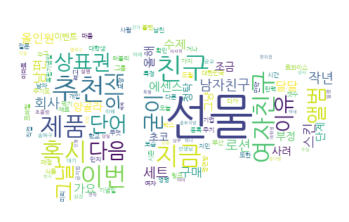

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time
from tqdm.notebook import tqdm
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

tmp_list = [] 

for i in tqdm(range(1, 50)):
    url = "https://kin.naver.com/search/list.nhn?query=%EB%B9%BC%EB%B9%BC%EB%A1%9C+%EB%8D%B0%EC%9D%B4&page="+str(i)
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")

    docs = soup.find("ul", {"class": "basic1"}).find_all("li")


    for doc in docs:
        ans = doc.find_all("dd")[1]
        tmp_list.append(ans.text.strip())

    time.sleep(0.5)
    
print(len(tmp_list))

okt = Okt()

ko_doc = '\n'.join(tmp_list)
ko_doc_noun = okt.nouns(ko_doc)
count_noun = Counter(ko_doc_noun)

stopword_list = ['빼빼로데이', '빼빼로', '데이']

for word in count_noun:
    if len(word) == 1:
        stopword_list.append(word)
        
for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

img_mask = np.array(Image.open('present.jpg'))
        
wc_noun = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\NanumGothic.ttf', mask=img_mask)
wc_noun = wc_noun.generate_from_frequencies(count_noun)

plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()